# Содержаиние
1) [Импорт данных](#part1)  
2) [Исследовательский анализ данных](#part2)  
3) [План работы](#part3)  
4) [Предобработка данных](#part4)  
5) [Обучение моделей](#part5)  
6) [Вывод](#part6)

<a name="part1"></a>
## Импорт данных 

In [1]:
import pandas as pd
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

In [4]:
#datasets = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]
#descriptions = ['данные об электродах', "данные о подаче сыпучих материалов (объём)", "данные о подаче сыпучих материалов (время)", 
             # "данные о продувке сплава газом", "результаты измерения температуры", "данные о проволочных материалах (объём)",
            # "данные о проволочных материалах (время)"]
#for dataset, description  in zip(datasets, descriptions):
    #print('--------------'*3,description,'--------------'*3)
    #print(dataset.info())

<a name="part2"></a>
## Исследовательский анализ данных 

### Данные об электродах

In [5]:
display(data_arc.head(10), data_arc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


None

count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: Активная мощность, dtype: float64


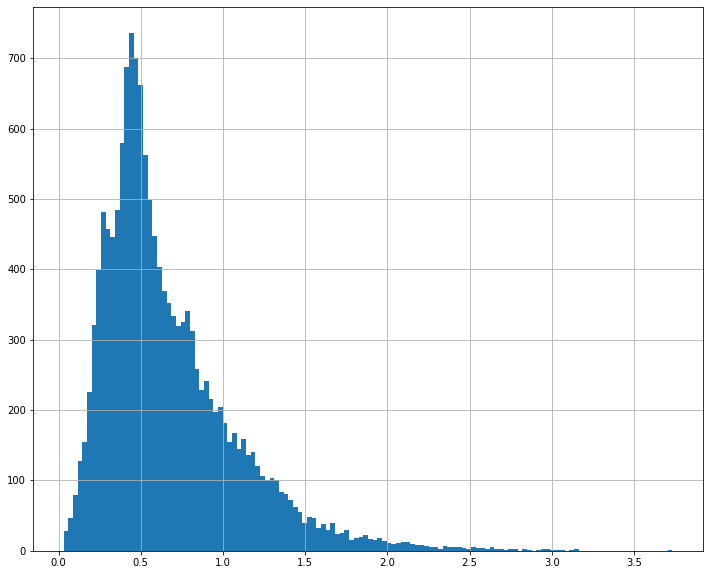

In [6]:
print(data_arc['Активная мощность'].describe())
data_arc['Активная мощность'].hist(bins = 130, figsize=(12,10))

In [7]:
print(len(data_arc[data_arc['Активная мощность'] >= 2.5])/len(data_arc))

0.003428340951868782


count    14876.000000
mean         0.452592
std          5.878702
min       -715.504924
25%          0.290991
50%          0.415962
75%          0.637371
max          2.676388
Name: Реактивная мощность, dtype: float64

count    14875.000000
mean         0.500723
std          0.310880
min          0.020806
25%          0.291003
50%          0.415984
75%          0.637403
max          2.676388
Name: Реактивная мощность, dtype: float64

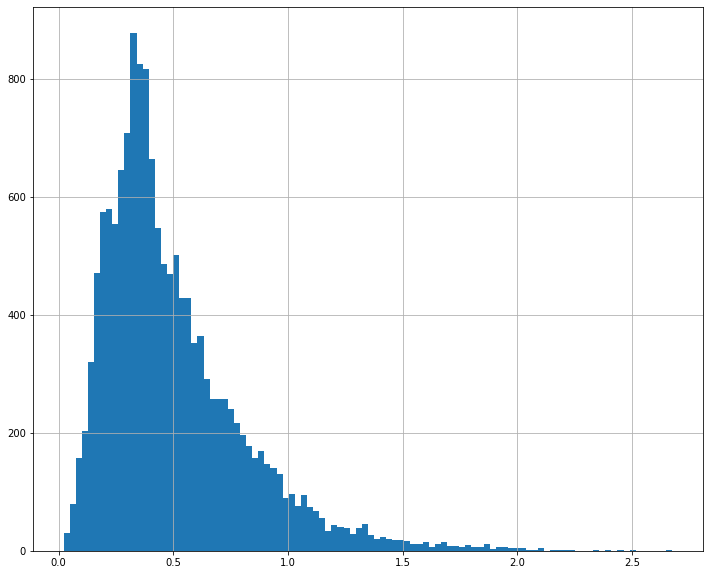

In [8]:
display(data_arc['Реактивная мощность'].describe())
data_arc = data_arc[data_arc['Реактивная мощность'] > 0]
display(data_arc['Реактивная мощность'].describe())
data_arc['Реактивная мощность'].hist(bins = 100, figsize = (12,10))

In [9]:
print(len(data_arc[data_arc['Реактивная мощность'] >= 2])/len(data_arc))

0.0017478991596638655


### данные о подаче сыпучих материалов (объём)

In [10]:
display(data_bulk.head(100), data_bulk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,100.0,202.0
96,108,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,23.0,206.0,NaN,103.0,202.0
97,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,101.0,203.0
98,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,106.0,204.0


None

In [11]:
for column in data_bulk.columns:
    if column[0] == 'B':
        print(column)
        display(data_bulk[column].describe())

Bulk 1


count    252.000000
mean      39.242063
std       18.277654
min       10.000000
25%       27.000000
50%       31.000000
75%       46.000000
max      185.000000
Name: Bulk 1, dtype: float64

Bulk 2


count     22.000000
mean     253.045455
std       21.180578
min      228.000000
25%      242.000000
50%      251.500000
75%      257.750000
max      325.000000
Name: Bulk 2, dtype: float64

Bulk 3


count    1298.000000
mean      113.879045
std        75.483494
min         6.000000
25%        58.000000
50%        97.500000
75%       152.000000
max       454.000000
Name: Bulk 3, dtype: float64

Bulk 4


count    1014.000000
mean      104.394477
std        48.184126
min        12.000000
25%        72.000000
50%       102.000000
75%       133.000000
max       281.000000
Name: Bulk 4, dtype: float64

Bulk 5


count     77.000000
mean     107.025974
std       81.790646
min       11.000000
25%       70.000000
50%       86.000000
75%      132.000000
max      603.000000
Name: Bulk 5, dtype: float64

Bulk 6


count    576.000000
mean     118.925347
std       72.057776
min       17.000000
25%       69.750000
50%      100.000000
75%      157.000000
max      503.000000
Name: Bulk 6, dtype: float64

Bulk 7


count     25.000000
mean     305.600000
std      191.022904
min       47.000000
25%      155.000000
50%      298.000000
75%      406.000000
max      772.000000
Name: Bulk 7, dtype: float64

Bulk 8


count     1.0
mean     49.0
std       NaN
min      49.0
25%      49.0
50%      49.0
75%      49.0
max      49.0
Name: Bulk 8, dtype: float64

Bulk 9


count     19.000000
mean      76.315789
std       21.720581
min       63.000000
25%       66.000000
50%       68.000000
75%       70.500000
max      147.000000
Name: Bulk 9, dtype: float64

Bulk 10


count    176.000000
mean      83.284091
std       26.060347
min       24.000000
25%       64.000000
50%       86.500000
75%      102.000000
max      159.000000
Name: Bulk 10, dtype: float64

Bulk 11


count    177.000000
mean      76.819209
std       59.655365
min        8.000000
25%       25.000000
50%       64.000000
75%      106.000000
max      313.000000
Name: Bulk 11, dtype: float64

Bulk 12


count    2450.000000
mean      260.471020
std       120.649269
min        53.000000
25%       204.000000
50%       208.000000
75%       316.000000
max      1849.000000
Name: Bulk 12, dtype: float64

Bulk 13


count     18.000000
mean     181.111111
std       46.088009
min      151.000000
25%      153.250000
50%      155.500000
75%      203.500000
max      305.000000
Name: Bulk 13, dtype: float64

Bulk 14


count    2806.000000
mean      170.284747
std        65.868652
min        16.000000
25%       119.000000
50%       151.000000
75%       205.750000
max       636.000000
Name: Bulk 14, dtype: float64

Bulk 15


count    2248.000000
mean      160.513345
std        51.765319
min         1.000000
25%       105.000000
50%       160.000000
75%       205.000000
max       405.000000
Name: Bulk 15, dtype: float64

### данные о подаче сыпучих материалов (время)

In [12]:
display(data_bulk_time.head(10), data_bulk_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null object
Bulk 2     22 non-null object
Bulk 3     1298 non-null object
Bulk 4     1014 non-null object
Bulk 5     77 non-null object
Bulk 6     576 non-null object
Bulk 7     25 non-null object
Bulk 8     1 non-null object
Bulk 9     19 non-null object
Bulk 10    176 non-null object
Bulk 11    177 non-null object
Bulk 12    2450 non-null object
Bulk 13    18 non-null object
Bulk 14    2806 non-null object
Bulk 15    2248 non-null object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


None

### данные о продувке сплава газом

In [13]:
display(data_gas.head(10), data_gas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


None

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64


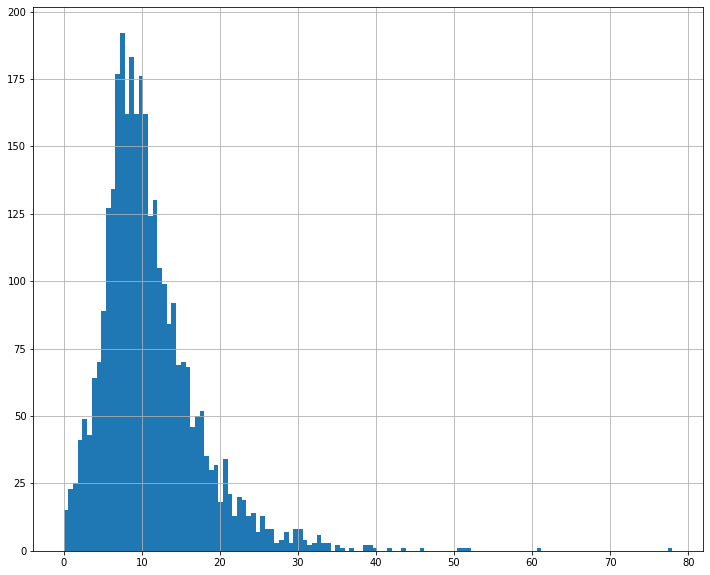

In [14]:
print(data_gas['Газ 1'].describe())
data_gas['Газ 1'].hist(bins = 130,figsize = (12,10))

In [15]:
print(len(data_gas[data_gas['Газ 1'] >= 35])/len(data_gas))

0.004939796233405372


###  результаты измерения температуры

In [16]:
display(data_temp.head(10), data_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


None

count    13006.000000
mean      1591.840920
std         21.375851
min       1191.000000
25%       1581.000000
50%       1591.000000
75%       1601.000000
max       1705.000000
Name: Температура, dtype: float64


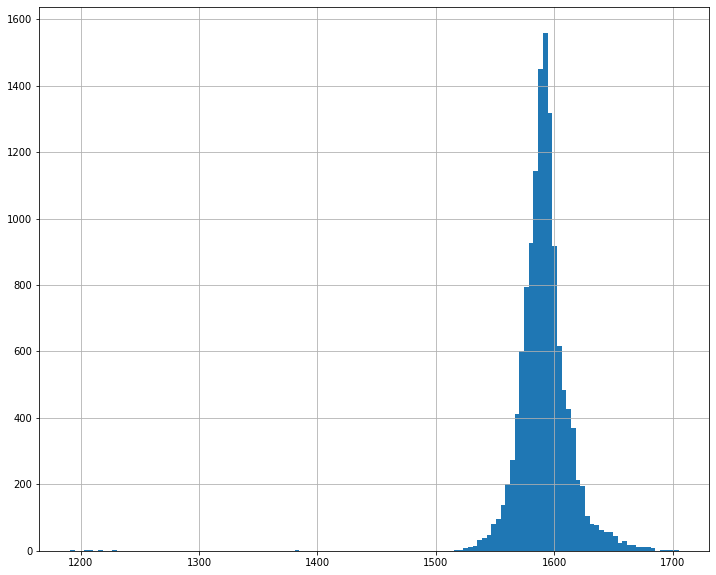

In [17]:
print(data_temp['Температура'].describe())
data_temp['Температура'].hist(bins = 130, figsize = (12,10))

In [18]:
print(len(data_temp[data_temp['Температура'] >= 1660])/len(data_temp))

0.0062865405167536305


### данные о проволочных материалах (объём)

In [19]:
display(data_wire.head(10), data_wire.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

In [20]:
for column in data_wire.columns:
    if column[0] == 'W':
        print(column)
        display(data_wire[column].describe())

Wire 1


count    3055.000000
mean      100.895853
std        42.012518
min         1.918800
25%        72.115684
50%       100.158234
75%       126.060484
max       330.314424
Name: Wire 1, dtype: float64

Wire 2


count    1079.000000
mean       50.577323
std        39.320216
min         0.030160
25%        20.193680
50%        40.142956
75%        70.227558
max       282.780152
Name: Wire 2, dtype: float64

Wire 3


count     63.000000
mean     189.482681
std       99.513444
min        0.144144
25%       95.135044
50%      235.194977
75%      276.252014
max      385.008668
Name: Wire 3, dtype: float64

Wire 4


count     14.000000
mean      57.442841
std       28.824667
min       24.148801
25%       40.807002
50%       45.234282
75%       76.124619
max      113.231044
Name: Wire 4, dtype: float64

Wire 5


count     1.000
mean     15.132
std         NaN
min      15.132
25%      15.132
50%      15.132
75%      15.132
max      15.132
Name: Wire 5, dtype: float64

Wire 6


count     73.000000
mean      48.016974
std       33.919845
min        0.034320
25%       25.053600
50%       42.076324
75%       64.212723
max      180.454575
Name: Wire 6, dtype: float64

Wire 7


count    11.000000
mean     10.039007
std       8.610584
min       0.234208
25%       6.762756
50%       9.017009
75%      11.886057
max      32.847674
Name: Wire 7, dtype: float64

Wire 8


count     19.000000
mean      53.625193
std       16.881728
min       45.076721
25%       46.094879
50%       46.279999
75%       48.089603
max      102.762401
Name: Wire 8, dtype: float64

Wire 9


count    29.000000
mean     34.155752
std      19.931616
min       4.622800
25%      22.058401
50%      30.066399
75%      43.862003
max      90.053604
Name: Wire 9, dtype: float64

###  Данные о проволочных материалах (время)

In [21]:
display(data_wire_time.head(10),data_wire_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

<a name = 'part3'></a>
## План работы 
1) Проведем предобработку данных. Удалим аномалии, заменим пропуски, приведем некоторые значения к нужным типам данных.  
2) Отберем целевой признак( конечную температуру из данных по температуре для одной партии)
3) Для обучения модели не будем использовать все предоставленные столбцы, с помощью матрицы корреляций найдем те, которые оказывают наибольшее влияние на целевой признак.  
5) Проверим на мультиколлинеарность  
4) Обучим несколько моделей ( линейная регрессия, XGBRegressor,RandomForestRegressor)  
5) Протестируем их и выберем лучшую. 

<a name = 'part4'></a>
## Предобработка данных

In [22]:
data_temp = data_temp.rename(columns = {'Температура':'temp', 'Время замера':'measure_time'})
data_arc.columns = ['key', 'start_time','end_time', 'active_power', 'reactive_power']
data_arc['start_time'] = pd.to_datetime(data_arc['start_time'], format='%Y%m%d %H:%M:%S')
data_arc['end_time'] = pd.to_datetime(data_arc['end_time'], format='%Y%m%d %H:%M:%S')
data_temp['measure_time'] = pd.to_datetime(data_temp['measure_time'], format='%Y%m%d %H:%M:%S')

In [23]:
#print(len(data_temp[data_temp['Температура'] >= 1660])/len(data_temp))
#data_temp = data_temp.query('temp >= 1400')
#data_temp['temp'].hist(bins = 100)

Температура плавления стали 1450-1520 C°, значения ниже 1400 удалим.

Просуммируем активную и реактивную мощности по номеру партии.

In [24]:
sum_data_arc = data_arc.pivot_table(index = 'key', values = ['active_power', 'reactive_power'], aggfunc = np.sum)
print(sum_data_arc.head())

     active_power  reactive_power
key                              
1        4.878147        3.183241
2        3.052598        1.998112
3        2.525882        1.599076
4        3.209250        2.060298
5        3.347173        2.252643


In [25]:
#print(data_temp.info())
#print(data_temp.head())
#print(data_arc.head())

Выделим те партии, в которых последний замер температуры был до финального нагрева дугой.

In [26]:
conditions = []
for key in list(data_temp['key'].unique()):
    if ((data_temp[data_temp['key'] == key]['measure_time'].max() < 
        data_arc[data_arc['key'] == key]['end_time'].max())):
            conditions.append(key)

            
#print(bad_keys, len(bad_keys))

In [27]:
print(data_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
measure_time    15907 non-null datetime64[ns]
temp            13006 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB
None


In [28]:
data_temp = data_temp.query('key not in @conditions')

In [29]:
print(data_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15178 entries, 0 to 15906
Data columns (total 3 columns):
key             15178 non-null int64
measure_time    15178 non-null datetime64[ns]
temp            12383 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 474.3 KB
None


In [30]:
data_temp = data_temp.dropna()

In [31]:
print(data_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12383 entries, 0 to 15902
Data columns (total 3 columns):
key             12383 non-null int64
measure_time    12383 non-null datetime64[ns]
temp            12383 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 387.0 KB
None


In [32]:
#data_temp['key'].value_counts()

Так же удалим строки, где было сделано только одно измерение температуры.

In [33]:
once_measure_count = (data_temp['key'].value_counts() < 2).sum() 
good_keys = list(data_temp['key'].value_counts().index[:-once_measure_count])
data_temp = data_temp.query('key in @good_keys')

In [34]:
#print(data_temp.info())

In [35]:
pivot_data_temp = data_temp.pivot_table(index= 'key', values = 'measure_time', aggfunc = {'measure_time' :[np.min, np.max]})

In [36]:
pivot_data_temp = pivot_data_temp[['amin', 'amax']]
pivot_data_temp.head()

,amin,amax
key,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39
2,2019-05-03 11:37:27,2019-05-03 11:59:12
3,2019-05-03 12:13:17,2019-05-03 12:34:57
4,2019-05-03 12:52:57,2019-05-03 12:59:25
5,2019-05-03 13:23:19,2019-05-03 13:36:01


In [37]:
data_temp_asc = data_temp.sort_values(by = ['measure_time'], ascending = True)
data_temp_asc = data_temp_asc.drop_duplicates(subset=['key'])
del data_temp_asc['measure_time']
data_temp_asc

,key,temp
0,1,1571.0
5,2,1581.0
11,3,1596.0
16,4,1601.0
19,5,1576.0
...,...,...
12250,2495,1570.0
12253,2496,1554.0
12257,2497,1571.0
12259,2498,1591.0


In [38]:
data_temp_desc = data_temp.sort_values(by = ['measure_time'], ascending = False)
data_temp_desc = data_temp_desc.drop_duplicates(subset=['key'])
del data_temp_desc['measure_time']
data_temp_desc

,key,temp
12266,2499,1603.0
12263,2498,1594.0
12258,2497,1589.0
12256,2496,1591.0
12252,2495,1591.0
...,...,...
20,5,1602.0
18,4,1625.0
15,3,1599.0
10,2,1602.0


Создадим единую таблицу с необходимыми данными.

In [39]:
pivot_data_temp = pivot_data_temp.merge(data_temp_asc,on = 'key')
pivot_data_temp = pivot_data_temp.merge(data_temp_desc,on = 'key')
pivot_data_temp = pivot_data_temp.merge(sum_data_arc,on = 'key')
pivot_data_temp = pivot_data_temp.merge(data_bulk,on = 'key')
pivot_data_temp = pivot_data_temp.merge(data_gas ,on = 'key')
pivot_data_temp = pivot_data_temp.merge(data_wire ,on = 'key')
#pivot_data_temp = pivot_data_temp[['key', 'amin', 'amax','temp_x','temp_y']]
#data_temp = data_temp.rename(columns = {'Температура':'temp', 'Время замера':'measure_time'})\
pivot_data_temp = pivot_data_temp.rename(columns = {'amin':'start_time', 'amax':'end_time','temp_x':'start_temp',
                                                    'temp_y':'end_temp'})

In [40]:
#pivot_data_temp

Еще при знакомстве с данными можно было заметить, что слобец wire 5 имеет только одно ненулевое значение,поэтому этот столбец просто удалим. Номер партии удалим, так как он никак не влияет на ход процесса и конечную температуру. Так же удалим строки, где пропущено значение конечной температуры.

In [41]:
pivot_data_temp = pivot_data_temp.dropna(subset=['end_temp'])
pivot_data_temp.info()
pivot_data_temp = pivot_data_temp.drop(['Wire 5','key'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2209
Data columns (total 32 columns):
key               2210 non-null int64
start_time        2210 non-null datetime64[ns]
end_time          2210 non-null datetime64[ns]
start_temp        2210 non-null float64
end_temp          2210 non-null float64
active_power      2210 non-null float64
reactive_power    2210 non-null float64
Bulk 1            189 non-null float64
Bulk 2            13 non-null float64
Bulk 3            926 non-null float64
Bulk 4            756 non-null float64
Bulk 5            53 non-null float64
Bulk 6            428 non-null float64
Bulk 7            13 non-null float64
Bulk 8            1 non-null float64
Bulk 9            13 non-null float64
Bulk 10           130 non-null float64
Bulk 11           124 non-null float64
Bulk 12           1730 non-null float64
Bulk 13           13 non-null float64
Bulk 14           1977 non-null float64
Bulk 15           1619 non-null float64
Газ 1             22

Приведем температуру к целочисленному типу.

In [42]:
pivot_data_temp = pivot_data_temp.fillna(0)
pivot_data_temp['start_temp'] = pd.to_numeric(pivot_data_temp['start_temp'], downcast='integer')
pivot_data_temp['end_temp'] = pd.to_numeric(pivot_data_temp['end_temp'], downcast='integer')

In [43]:
for column in pivot_data_temp.columns:
    if column[0] == 'B':
        pivot_data_temp[f'{column}'] = pd.to_numeric(pivot_data_temp[f'{column}'], downcast='integer')
pivot_data_temp = pivot_data_temp.drop(['start_time', 'end_time'], axis=1)

In [44]:
#pivot_data_temp.info()

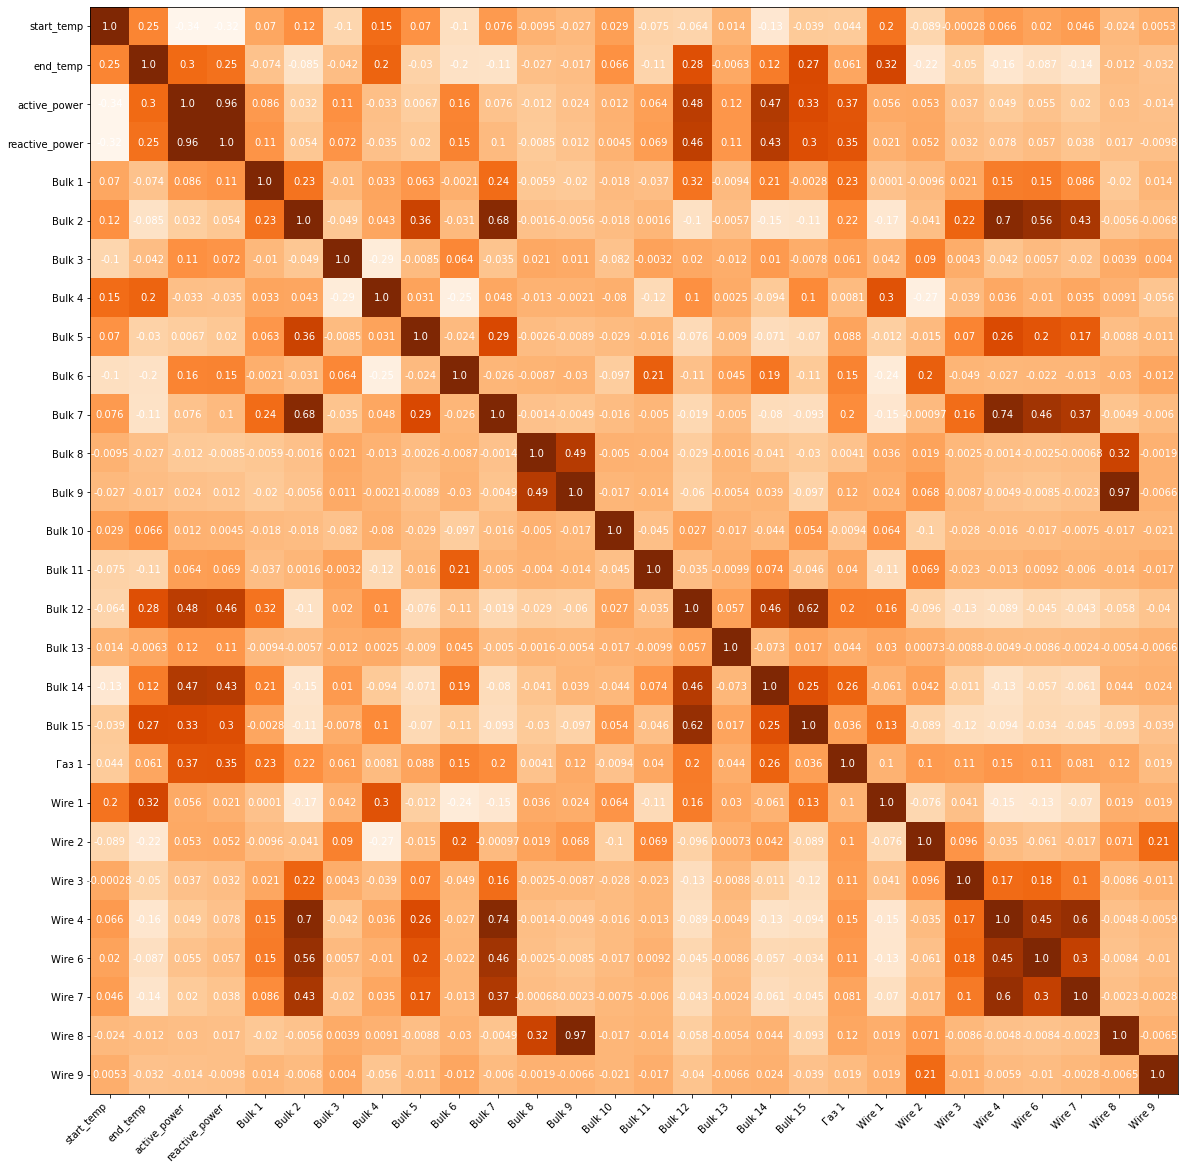

In [45]:
data_corr= pivot_data_temp.copy()
corr_heatmap_data = pivot_data_temp.corr()

fig, ax = plt.subplots(figsize=(20,20))
ax.set_xticks(np.arange(len(corr_heatmap_data.index)))
ax.set_yticks(np.arange(len(corr_heatmap_data.index)))

ax.set_xticklabels(corr_heatmap_data.index)
ax.set_yticklabels(corr_heatmap_data.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

data = corr_heatmap_data.values

for i in range(len(corr_heatmap_data.index)):
    for j in range(len(corr_heatmap_data.index)):
        text = ax.text(j, i, '{:.2}'.format(data[i, j]),
                       ha="center", va="center", color="w")
        
im = ax.imshow(corr_heatmap_data.corr(), cmap='Oranges')

In [46]:
data_corr = data_corr.drop(['reactive_power', 'Wire 8'], axis=1)

In [47]:
data_corr.corr()['end_temp']

start_temp      0.248130
end_temp        1.000000
active_power    0.296778
Bulk 1         -0.073769
Bulk 2         -0.084983
Bulk 3         -0.042118
Bulk 4          0.195285
Bulk 5         -0.030057
Bulk 6         -0.199722
Bulk 7         -0.110279
Bulk 8         -0.027369
Bulk 9         -0.017078
Bulk 10         0.065526
Bulk 11        -0.106113
Bulk 12         0.275513
Bulk 13        -0.006319
Bulk 14         0.116903
Bulk 15         0.271336
Газ 1           0.060856
Wire 1          0.323975
Wire 2         -0.221737
Wire 3         -0.049656
Wire 4         -0.163896
Wire 6         -0.086956
Wire 7         -0.140621
Wire 9         -0.032032
Name: end_temp, dtype: float64

выделим те столбцы, которые больше всего влияют на конечную температуру.

In [48]:
imp_features = []
list_corr = dict(data_corr.corr()['end_temp'])
#print(list_corr)
for i in list_corr:
    if list_corr[f'{i}'] >= 0.1:
        imp_features.append(i)
print(imp_features)

['start_temp', 'end_temp', 'active_power', 'Bulk 4', 'Bulk 12', 'Bulk 14', 'Bulk 15', 'Wire 1']


In [49]:
#print(len(pivot_data_temp))

<a name ='part5'></a>
## Обучение моделей

In [50]:
random_state = 12345

features = pivot_data_temp.drop('end_temp', axis=1)
target = pivot_data_temp['end_temp']

features_train, features_test, target_train, target_test = train_test_split(
                                                            features, 
                                                            target, 
                                                            test_size=0.25, 
                                                            random_state=random_state)
cv_counts = 5

### Линейная регрессия

In [51]:
regressor = LinearRegression()
cv_MAE_LR = (cross_val_score(regressor, 
                             features_train, 
                             target_train, 
                             cv=cv_counts, 
                             scoring='neg_mean_absolute_error').mean() * -1)
print('Средний MAE ', cv_MAE_LR)

Средний MAE  6.4038456434270525


### XGBRegressor

In [52]:
regressor = XGBRegressor() 
hyperparams = [{'learning_rate':[x/100 for x in range(1, 51)],
                'random_state':[random_state],
               'silent':[True]}]

clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=cv_counts)
clf.fit(features_train, target_train)
print("Наиболее подходящие параметры:")
best_params_XGBR = clf.best_params_
print(clf.best_params_)

Наиболее подходящие параметры:
{'learning_rate': 0.18, 'random_state': 12345, 'silent': True}


### RandomForestRegressor

In [53]:
regressor = RandomForestRegressor() 
hyperparams = [{'criterion':['mse'],
                'n_estimators':[x for x in range(100, 1001, 50)], 
                'random_state':[random_state]}]

clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_absolute_error', cv=cv_counts)
clf.fit(features_train, target_train)
print("Наиболее подходящие параметры:")
best_params_RFR = clf.best_params_
print(clf.best_params_)

Наиболее подходящие параметры:
{'criterion': 'mse', 'n_estimators': 900, 'random_state': 12345}


### Проверка моделей

In [54]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_test.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    label = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    title = ax.set_title('Визуализация важности признаков')

MAE on test for LinearRegression = 6.51199595504234


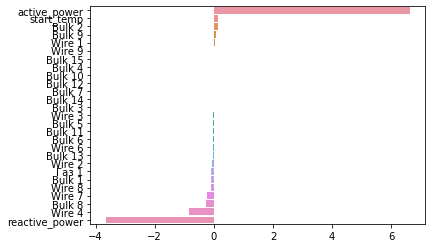

In [60]:
LR = LinearRegression()
LR.fit(features_train, target_train)
target_predict = LR.predict(features_test)
test_MAE_LR = mean_absolute_error(target_predict, target_test)
print('MAE on test for LinearRegression =', test_MAE_LR)
feature_imprtnr = pd.Series(LR.coef_, index=features_test.columns).sort_values(ascending=False)
ax_lr = sns.barplot(x=feature_imprtnr, y=feature_imprtnr.index)
label_lr = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
title_lr = ax.set_title('Визуализация важности признаков')

Средний MAE  5.760421
/bin/bash: -c: line 0: syntax error near unexpected token `attachment:image.png'
/bin/bash: -c: line 0: `[image.png](attachment:image.png)'


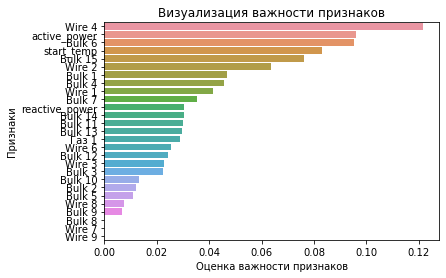

In [56]:
gxbregressor = XGBRegressor()
gxbregressor.set_params(**best_params_XGBR)
gxbregressor.fit(features_train, target_train)
target_predict = gxbregressor.predict(features_test)
test_MAE_XGBR = mean_absolute_error(target_predict, target_test)
print('Средний MAE ', test_MAE_XGBR)
chart_feature_imp(gxbregressor)
![image.png](attachment:image.png)

MAE on test of RandomForestRegressor = 5.973934096845489
/bin/bash: -c: line 0: syntax error near unexpected token `attachment:image.png'
/bin/bash: -c: line 0: `[image.png](attachment:image.png)'


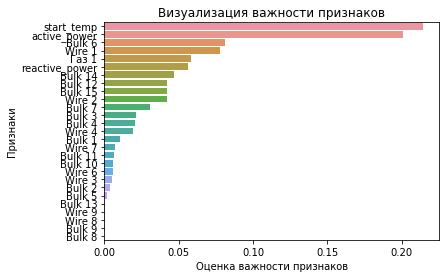

In [57]:
random_forest = RandomForestRegressor()
random_forest.set_params(**best_params_RFR)
random_forest.fit(features_train, target_train)
target_predict = random_forest.predict(features_test)
test_MAE_RFR = mean_absolute_error(target_predict, target_test)
print('MAE on test of RandomForestRegressor =', test_MAE_RFR)
chart_feature_imp(random_forest)
![image.png](attachment:image.png)

In [ ]:
#import seaborn as sns
'''def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features_valid.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    label = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    title = ax.set_title('Визуализация важности признаков')'''

#chart_feature_imp(RandomForestRegressor)
#![image.png](attachment:image.png)

<a name = 'part6'></a>
# Вывод

В ходе проекта ознакомился с предоставленными данными об обработке стали. Избавился от некорректных значений в некоторых столбцах. Проверил данные на мультиколлинеарность и нашел столбцы, которые больше всего влияют на конечную температуру. Обучил несколько моделей, подбор параметров осуществлял с помощью GridSearch. Наилучшую метрику показала модель XGBRegressor, ее MAE равень 5.7, значит модель ошибается в среднем на 5-6 градусов.